# Project: Investigate a Dataset - TMDb movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
#import the necessary packages for this dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='intro'></a>
## Introduction
>In this section I will give a brief introduction to the dataset I've chosen for this project. At the end, I will include the questions I plan on exploring using this dataset.

### Dataset Description 

> For this assignment, I will be using the TMDb dataset. This dataset contains information about 10000 movies collected from The Movie Database (TMDb). 

>Firstly, I will import the necessary packages and view some part of the data that can give insight to possible questions to be explored and answered.


In [58]:
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [59]:
df_tmdb = pd.read_csv('tmdb-movies.csv')
df_tmdb.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

<b><h3>Questions that can be gotten from the dataset above include:</h3></b>

   <b><h5>Some General Questions include:</h5></b>
    <ul>
        <li>What kind of properties are associated with movies that have high revenue?</li>
        <li>What movie had the highest and lowest budget?</li>
        <li>What movie had the highest and lowest revenue?</li>
        <li>What movie had the highest and lowest profit?</li>
    <li>Do the user ratings affect popularity of a movie?</li>
    <li> Does the voting average of a movie affect it's success and popularity?</li>
    <li>What determines the success of a movie?</li>
    <li>Which movie is most popular from year to year?</li>
    

<a id='wrangling'></a>
## Data Wrangling

> In this section, I will be loading and exploring data to check for cleanliness  


In [60]:
# Load the dataset.
df_tmdb.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

In [61]:
#Let us check the summary of dataframe
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [62]:
df_tmdb.describe()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.8129

<p>This information shows that this dataset does not need much datatype conversion</p>
<p>However, the datatype for release_date is not in a datetime format and needs to be converted </p>

<p><h2>Let's check for duplicates and null values in the dataset</h2></p>

In [63]:
#Get the sum of duplicated rows
sum(df_tmdb.duplicated())

1

In [64]:
df_tmdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Although there are a lot of empty rows in different columns, I wouldn't need to worry about them because they aren't needed to answer the questions

<h2>Cleaning Steps</h2>
<ol>
    <li>Firstly, I would need to drop columns that would not be used in answering questions</li>
    <li>Secondly, drop one duplicated row</li>
    <li>Thirdly, remove the zeros in budget and revenue columns. This will allow us calculate profit values to a level of accuracy</li>
    <li>Fourthly, remove the zeros in budget_adj and revenue_adj columns. This will allow us calculate profit values when accounting for inflation to a level of accuracy</li>
    <li>Replace zero values in runtime to NaN</li>
    <li>Convert release_date column to the dateformat</li>
           </ol>


### Data Cleaning (We shall begin the data cleaning process)
><b>1. </b>I will be starting with dropping the unwanted columns such as id,imdb_id,homepage,keywords,director,cast, tagline,overview,production_companies, vote_count.
 

In [65]:
#Declare columns that need to be deleted 
delete_col = ['id', 'imdb_id', 'homepage','keywords', 'director','cast', 'tagline', 'overview', 'production_companies','vote_count']
#drop declared columns from the database
df_tmdb.drop(delete_col, axis=1, inplace=True)
#view new dataset
df_tmdb.head()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

   popularity     budget     revenue                original_title  runtime  \
0   32.985763  150000000  1513528810                Jurassic World      124   
1   28.419936  150000000   378436354            Mad Max: Fury Road      120   
2   13.112507  110000000   295238201                     Insurgent      119   
3   11.173104  200000000  2068178225  Star Wars: The Force Awakens      136   
4    9.335014  190000000  1506249360                     Furious 7      137   

                                      genres release_date  vote_average  \
0  Action|Adventure|Science Fiction|Thriller       6/9/15           6.5   
1  Action|Adventure|Science Fiction|Thriller      5/13/15           7.1   
2         Adventure|Science Fiction|Thriller      3/18/15           6.3   
3   Action|Adventure|Science Fiction|Fantasy     12/15/15           7.5   
4                      Action|Crime|Thriller       4/1/15           7.3   

   release_year    budget_adj   revenue_adj  
0          2015  1.379999e+0

Let us now view the number of entries in our dataset 

In [66]:
#Store the number of rows and columns. Note that this includes the header row
rows, cols = df_tmdb.shape
print(f'There are {rows} rows left and {cols} columns left')

There are 10866 rows left and 11 columns left


<b>2.</b> Let us delete the duplicate of a row in the dataset

In [67]:
#Drop one of the duplicate rows. I will be keeping the first
df_tmdb.drop_duplicates(keep = 'first', inplace = True)
#verify the action. This includes the header row
rows, cols = df_tmdb.shape
print(f'There are {rows} rows left and {cols} columns left')

There are 10865 rows left and 11 columns left


<b>3.</b> Remove all the rows that have '0' value in the budget and revenue columns so we can calculate profit. 

In [68]:
#declare columns that need to be checked 
chk_col = ['budget', 'revenue']
#Replace 0 with NaN
df_tmdb[chk_col] = df_tmdb[chk_col].replace(0, np.NaN)
#drop rows with null or NaN values 
df_tmdb.dropna(subset = chk_col, inplace = True)
#check the new number of rows 
rows, cols = df_tmdb.shape
print(f'There are {rows} rows left')

There are 3854 rows left


<b>4.</b> Remove all rows that have '0' value in the budget_adj and revenue_adj

In [69]:
#declare columns that need to be checked 
chk_col_adj = ['budget_adj', 'revenue_adj']
#Replace 0 with NaN
df_tmdb[chk_col_adj] = df_tmdb[chk_col_adj].replace(0, np.NaN)
#drop rows with null or NaN values 
df_tmdb.dropna(subset = chk_col_adj, inplace = True)
#check the new number of rows 
rows, cols = df_tmdb.shape
print(f'There are {rows} rows left')

There are 3854 rows left


<b>5. </b>Replace '0' values in runtime to NaN

In [70]:
#Replace runtime value of '0' to NaN
df_tmdb['runtime'] = df_tmdb['runtime'].replace(0,np.NaN)
#confirm action
chk_runtime = df_tmdb.query('runtime == 0')
chk_runtime

TypeError: __init__() got an unexpected keyword argument 'max_rows'

Empty DataFrame
Columns: [popularity, budget, revenue, original_title, runtime, genres, release_date, vote_average, release_year, budget_adj, revenue_adj]
Index: []

<b>6.</b> convert the 'release_date' column into date format

In [71]:
#Convert release_date to DateTime
df_tmdb.release_date = pd.to_datetime(df_tmdb['release_date'])
#Let us confirm
df_tmdb.dtypes

popularity               float64
budget                   float64
revenue                  float64
original_title            object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

In [72]:
#View the statistics of the dataset
df_tmdb.describe()

TypeError: __init__() got an unexpected keyword argument 'max_rows'

        popularity        budget       revenue      runtime  vote_average  \
count  3854.000000  3.854000e+03  3.854000e+03  3854.000000   3854.000000   
mean      1.191554  3.720370e+07  1.076866e+08   109.220291      6.168163   
std       1.475162  4.220822e+07  1.765393e+08    19.922820      0.794920   
min       0.001117  1.000000e+00  2.000000e+00    15.000000      2.200000   
25%       0.462368  1.000000e+07  1.360003e+07    95.000000      5.700000   
50%       0.797511  2.400000e+07  4.480000e+07   106.000000      6.200000   
75%       1.368324  5.000000e+07  1.242125e+08   119.000000      6.700000   
max      32.985763  4.250000e+08  2.781506e+09   338.000000      8.400000   

       release_year    budget_adj   revenue_adj  
count   3854.000000  3.854000e+03  3.854000e+03  
mean    2001.261028  4.423999e+07  1.370647e+08  
std       11.282575  4.480925e+07  2.161114e+08  
min     1960.000000  9.693980e-01  2.370705e+00  
25%     1995.000000  1.309053e+07  1.835735e+07  
50%   

We can now see that the 'release_date' column is now in the date format


<b>This brings us to the end of cleaning our dataset</b>

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've cleaned our dataset, we shall begin exploring the data to answer the questions raised in the introduction section. This will be done using visualisations and statistics.


### Research Question 1 (What movie had the highest and lowest budget?) 

In [73]:
#Check the movie with the highest budget 
df_tmdb.loc[df_tmdb['budget'].idxmax()]

popularity                                          0.25054
budget                                             4.25e+08
revenue                                         1.10876e+07
original_title                            The Warrior's Way
runtime                                                 100
genres            Adventure|Fantasy|Action|Western|Thriller
release_date                            2010-12-02 00:00:00
vote_average                                            6.4
release_year                                           2010
budget_adj                                         4.25e+08
revenue_adj                                     1.10876e+07
Name: 2244, dtype: object

In [74]:
#Check the movie with the lowest budget
df_tmdb.loc[df_tmdb['budget'].idxmin()]

popularity                   0.090186
budget                              1
revenue                           100
original_title           Lost & Found
runtime                            95
genres                 Comedy|Romance
release_date      1999-04-23 00:00:00
vote_average                      4.8
release_year                     1999
budget_adj                    1.30905
revenue_adj                   130.905
Name: 2618, dtype: object

<html>
    <p>To answer the question, <b>Which movie had the highest and lowest budget?</b></p></br>
   <p>Highest => The Warriors Way budgeted at 425 million dollars </p></br>
   <p>Lowest => Lost and Found budgeted at 1 dollar</p>
   
   </html>

<b>We would now check for trends between genres and high budgets </b>
This helps us determine the genres with high budget which can aid the decisions of directors and those involved in the planning and making a movie.

Let us determine the median to give an even distribution of low and high budgets first

In [75]:
#Determine the median
med_bud = df_tmdb['budget'].median()
#store budgets above the median
df_tmdb_highb = df_tmdb.query(f'budget >= {med_bud}')

Next, determine the genres with high budgets

In [76]:
#Concating the data with |, splitting them and counting each occurence
gen = pd.Series(df_tmdb_highb['genres'].str.cat(sep= '|').split('|'))
#getting the counts of each genre
gen = gen.value_counts()
gen

Drama              756
Action             746
Comedy             676
Thriller           629
Adventure          557
Crime              335
Science Fiction    331
Family             315
Fantasy            299
Romance            296
Mystery            185
Animation          166
Horror             120
History             75
War                 66
Music               53
Western             29
Foreign              1
dtype: int64

This shows that dramas, action movies, comedies , thrillers , adventure movies, crime ,sci-fi, romance, mystery on most occasions have high budgets while history, war, music and others have lower budgets have lesser budgets most times with foreign movies having the lowest count of high budgets

We can also visualize this data

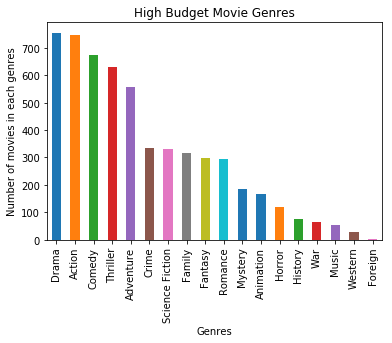

In [77]:
#initialize plot
visual = gen.plot.bar(fontsize = 10 )
#title of plot
visual.set(title = 'High Budget Movie Genres')
#x-label
visual.set_xlabel('Genres')
#y-label
visual.set_ylabel('Number of movies in each genres')
plt.show();

### Next, we would determine the movie with the highest and lowest revenue
> Here, we will also determine the genres with the highest and lowest revenue as well as the relationship between budget and revenue. 

>We would also be checking genres that get the most revenue

In [78]:
#Check the movie with the highest revenue 
df_tmdb.loc[df_tmdb['revenue'].idxmax()]

popularity                                         9.43277
budget                                            2.37e+08
revenue                                        2.78151e+09
original_title                                      Avatar
runtime                                                162
genres            Action|Adventure|Fantasy|Science Fiction
release_date                           2009-12-10 00:00:00
vote_average                                           7.1
release_year                                          2009
budget_adj                                     2.40887e+08
revenue_adj                                    2.82712e+09
Name: 1386, dtype: object

In [79]:
#Check the movie with the lowest revenue 
df_tmdb.loc[df_tmdb['revenue'].idxmin()]

popularity                   0.462609
budget                          6e+06
revenue                             2
original_title        Shattered Glass
runtime                            94
genres                  Drama|History
release_date      2003-11-14 00:00:00
vote_average                      6.4
release_year                     2003
budget_adj                7.11212e+06
revenue_adj                   2.37071
Name: 5067, dtype: object

<html>
    <p><b>Which movie had the highest and lowest revenue?</b></p></br>
   <p>Highest => Avatar with a revenue of about 2.78 billion dollars </p></br>
   <p>Lowest => Shattered Glass with a revenue of 2 dollars</p>
</html>

#### Let us now determine movie genres that have higher revenue

In [80]:
#Determine the median
med_rev = df_tmdb['revenue'].median()
#store budgets above the median
df_tmdb_highr = df_tmdb.query(f'revenue >= {med_rev}')

Visualize data

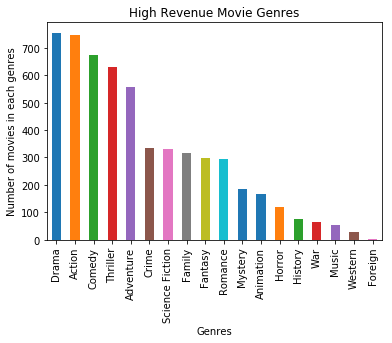

In [81]:
#initialize plot
visual_rev = gen.plot.bar(fontsize = 10 )
#title of plot
visual_rev.set(title = 'High Revenue Movie Genres')
#x-label
visual_rev.set_xlabel('Genres')
#y-label
visual_rev.set_ylabel('Number of movies in each genres')
plt.show();

This information shows that most high revenue movies are usually dramas, comedies, action, thrillers, adventure while the middle ones are crime ,romance, family, science fiction, fantasy and the low revenue movies are usually horror, mystery, animation, history, music, war, western, documentary with foreign being the lowest


##### Next we will determine the association between budget and revenue

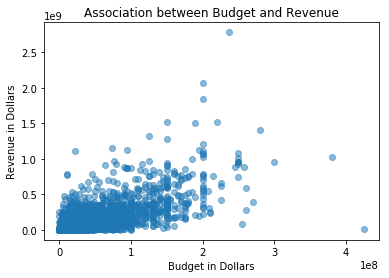

In [82]:
#x-label
plt.xlabel('Budget in Dollars')
#y-label 
plt.ylabel('Revenue in Dollars')
#title of plot
plt.title('Association between Budget and Revenue')
plt.scatter(df_tmdb['budget'],df_tmdb['revenue'], alpha=0.5)
plt.show();

This shows little correlation between budget and revenue. A conlusion can be drawn that a high budget doesn't determine high revenue.

## Which movie has the highest and lowest profit?
First, we need to create a column for profit in the dataset

In [ ]:
#To calculate the profit, we need to add a column for profit in the dataset by subtracting the budget from the revenue
df_tmdb['profit'] = df_tmdb['revenue'] - df_tmdb['budget']
#Let's view the new dataset
df_tmdb.head()

OptionError: "No such keys(s): 'compute.use_numexpr'"

Let us do the same for the budget and revenue when inflation is taken into consideration

In [ ]:
#Calculate profit_adj by subtracting the budget_adj from the revenue_adj
df_tmdb['profit_adj'] = df_tmdb['revenue_adj'] - df_tmdb['budget_adj']
#Let's view the new dataset
df_tmdb.head()

>View the statistics of the new dataset

In [ ]:
df_tmdb.describe()

In [ ]:
df_tmdb['inflation_rate']  = (df_tmdb['profit_adj'] - df_tmdb['profit'])/df_tmdb['profit']
df_tmdb['inflation_rate'] = df_tmdb['inflation_rate'] * 100
df_tmdb.head()

We can now determine the movie with the highest profit

In [ ]:
df_tmdb.loc[df_tmdb['profit'].idxmax()]

We would now determine the movie with the lowest profit

In [ ]:
df_tmdb.loc[df_tmdb['profit'].idxmin()]

From these we can conclude that movie with the 
<html>
    <p><b>Highest Profit =></b> Avatar with a profit of approximately 26 billion dollars</p> </br>
    <b>Lowest Profit =></b> The Warrior's way with a loss of about 413 million dollars
</html>

### Determine the association of revenue with profit

In [ ]:
#x-axis
plt.xlabel("Revenue")
#y-axis
plt.ylabel('Profit')
#title
plt.title('Association of Revenue with Profit')
plt.scatter(df_tmdb['revenue'], df_tmdb['profit'], alpha = 0.5)
plt.show();

This shows a positive correlation between revenue and profit. With this we can conclude that the same characteristic revenue possess, profits also possess.
>To confirm this we can plot the different genres on a bar chart 

From the previous analysis of revenue and profit, we saw that they had a direct relationship. So we can already conclude that profit does not depend on the popularity as well.

>For a visual representation we would compare them using scatterplots, but we must first get a median for the profit 


In [ ]:
#Determine the median
med_prft = df_tmdb['profit'].median()
#store budgets above the median
df_tmdb_highp = df_tmdb.query(f'profit >= {med_prft}')

In [ ]:
#Concating the data with |, splitting them and counting each occurence
genp = pd.Series(df_tmdb_highp['genres'].str.cat(sep= '|').split('|'))
#getting counts of each genre
genp = genp.value_counts()
genp

In [ ]:
#initialize plot
visual_prft = genp.plot.bar(fontsize = 10 )
#title of plot
visual_prft.set(title = 'High Revenue Movie Genres')
#x-label
visual_prft.set_xlabel('Genres')
#y-label
visual_prft.set_ylabel('Number of movies in each genres')
plt.show();

### Research Question 2 (What determines the success of a movie?)
> For this we would use profit as the measure of a movie's success.
>Let us check the correlation betweeen popularity and revenue as well as popularity and profit. This is to determine if the revenue and profit of a movie is based on its popularity

We can do this by checking the most popular movie genres

In [ ]:
#First, let us check the most popular movie 
df_tmdb.loc[df_tmdb['popularity'].idxmax()]

In [ ]:
#Let us check for the least popular movie 
df_tmdb.loc[df_tmdb['popularity'].idxmin()]

We can see that the comparing the results of the most popular movie and with the earlier results of the movie with the most revenue does not give a direct relationship between.
>Let us see if this is just an exceptional case or it follows a trend


In [ ]:
#x-axis
plt.xlabel("Popularity")
#y-axis
plt.ylabel('Revenue')
#title
plt.title('Association of Popularity with Revenue')
plt.scatter(df_tmdb['popularity'], df_tmdb['revenue'], alpha = 0.5)
plt.show();

This shows that there is very little or no correlation between popularity and revenue. We can therefore conclude that the revenue of a movie does not depend on its popularity.

In [ ]:
#x-axis
plt.xlabel("Popularity")
#y-axis
plt.ylabel('Profit')
#title
plt.title('Association of Popularity with Profit')
plt.scatter(df_tmdb['popularity'], df_tmdb['profit'], alpha = 0.5)
plt.show();

The assumption has been confirmed. Although, there is a very minimal difference.

##### In conclusion , the profit and revenue of a movie does not depend its popularity

### Research Question 3  (Does the voting average of a movie affect it's success and popularity? )
>Here we would be analyzing the correlation of the voters ratings and profit as well as it's popularity

In [ ]:
#x-axis
plt.xlabel("Vote average")
#y-axis
plt.ylabel('Profit')
#title
plt.title('Association of User ratings with Profit')
plt.scatter(df_tmdb['vote_average'], df_tmdb['profit'], alpha = 0.5)
plt.show();

This shows that there is no correlation between the vote average and profit 

>Find the association between vote average and popularity

In [ ]:
#x-axis
plt.xlabel("Vote average")
#y-axis
plt.ylabel('Popularity')
#title
plt.title('Association of Vote Average with Popularity')
plt.scatter(df_tmdb['vote_average'], df_tmdb['popularity'], alpha = 0.5)
plt.show();

In [ ]:
df_tmdb['runtime'].plot(kind = 'hist')
plt.show()

No correlation between vote average and popularity

### Research Question 3 ( Which genres are most popular from year to year?)

Firstly, take a look at the popularity distribution

In [ ]:
df_tmdb.popularity.hist();

We can see that the major popularity fall below 1

In [ ]:
df_tmdb['popularity'].describe()

In [ ]:
#split the genres string
df_tmdb.genres  = df_tmdb.genres.str.split('|')

#create genre list uing explode
df_tmdb = df_tmdb.explode('genres')

dt = df_tmdb.groupby(['release_year','genres'])['popularity'].mean().groupby(level='release_year').nlargest(1).reset_index(level=0, drop=True)

# change the pandas series to dataframe
dt = dt.reset_index()


In [ ]:
dt.head()

Plot a scatter plot to visualize the most popular genre of each year

In [ ]:
dt.genres.value_counts()

## Some of the limitaions of this dataset include 
>Most movies have multiple genres and this affects further calulations

<a id='conclusions'></a>
## Conclusions

>From All the explorations we can conclude that Dramas, Comedy, Action,Adventure and Thriller yield the highest revenue and profit however also have the highest budgets. 


In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0